In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import pandas as pd
import pickle
import seaborn as sns
from colorama import Fore, Back, Style

## Preliminary Datasets Review and Analysis

In [2]:
from IPython.display import Image
Image(url="Output/dataset_relationship.gif")

In [3]:
cab_data = pd.read_csv("Cab_Data.csv")
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data.dtypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [5]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [6]:
print(Fore.YELLOW+ Back.BLACK + "Cab_Data.csv Data Dimension:",Style.RESET_ALL)
cab_data.shape

Cab_Data.csv Data Dimension: 


(359392, 7)

In [7]:
#check to see if there are any missing values
cab_data.isnull().values.any()

False

In [8]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [9]:
#cab_data.describe()

In [10]:
city = pd.read_csv("City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [11]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [12]:
print(Fore.YELLOW+ Back.BLACK + "City.csv Data Dimension:",Style.RESET_ALL)
city.shape

City.csv Data Dimension: 


(20, 3)

In [13]:
#check to see if there are any missing data values
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [14]:
customer_id = pd.read_csv("Customer_ID.csv")
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [15]:
customer_id.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [16]:
print(Fore.YELLOW+ Back.BLACK + "Customer_ID.csv Data Dimension:",Style.RESET_ALL)
customer_id.shape

Customer_ID.csv Data Dimension: 


(49171, 4)

In [17]:
# check missing values
customer_id.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [18]:
transaction_id = pd.read_csv("Transaction_ID.csv")
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [19]:
transaction_id.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [20]:
print(Fore.YELLOW+ Back.BLACK + "transaction_id.csv Data Dimension:",Style.RESET_ALL)
transaction_id.shape

transaction_id.csv Data Dimension: 


(440098, 3)

In [21]:
# check any missing values
transaction_id.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

### Concatenate datasets by Unique Identifiers

In [22]:
from IPython.display import Image
Image(url="data_columns.gif")

### Join Transaction_ID with Customer_ID dataset by Customer ID column

In [23]:
df1 =pd.merge(transaction_id, customer_id, left_on="Customer ID", right_on="Customer ID")
df1

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237
...,...,...,...,...,...,...
440093,10439799,12490,Cash,Male,33,18713
440094,10439820,14971,Card,Male,30,15346
440095,10439838,41414,Card,Male,38,3960
440096,10439840,41677,Cash,Male,23,19454


### Join Cab_Data with City dataset by City column

In [24]:
df2 =pd.merge(cab_data, city, left_on="City", right_on="City")
df2

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701"
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701"
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...
359387,10440101,1/8/2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001"
359388,10440104,1/4/2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001"
359389,10440105,1/5/2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001"
359390,10440106,1/5/2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001"


### Finally Join df1 and df2 into the complete dataframe df

In [25]:
df = pd.merge(df1, df2, left_on="Transaction ID", right_on="Transaction ID")

In [26]:
df

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10351127,29290,Cash,Male,28,10813,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,10412921,29290,Card,Male,28,10813,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,10000012,27703,Card,Male,27,9237,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,10320494,27703,Card,Male,27,9237,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,Female,42,19417,1/7/2018,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,"671,238","25,063"
359388,10439799,12490,Cash,Male,33,18713,1/3/2018,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,"1,177,609","27,247"
359389,10439838,41414,Card,Male,38,3960,1/4/2018,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,"631,442","5,712"
359390,10439840,41677,Cash,Male,23,19454,1/6/2018,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,"631,442","5,712"


In [27]:
# Convert Data types in the dataframe df
df['Population'] = df['Population'].str.replace(',','')
df['Users'] = df['Users'].str.replace(',','')

#Convert objects to integer datatypes
df['Population'] = df['Population'].astype(int)
df['Users'] = df['Users'].astype(int)

In [28]:
# Check any missing values
df.isnull().sum().sum()

0

In [29]:
# Checking duplicates
print('Number of duplicates: ', np.sum(df.duplicated()))

Number of duplicates:  0


In [30]:
df.dtypes

Transaction ID          int64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Population              int32
Users                   int32
dtype: object

In [31]:
df.shape

(359392, 14)

In [32]:
df.describe()

,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,423.443311,286.190113,3.132198e+06,158365.582267
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,274.378911,157.993661,3.315194e+06,100850.051020
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000,2.489680e+05,3643.000000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000,6.712380e+05,80021.000000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.360000,282.480000,1.595037e+06,144132.000000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,583.660000,413.683200,8.405837e+06,302149.000000
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,2048.030000,691.200000,8.405837e+06,302149.000000


In [33]:
df["Transaction ID"].count()

359392

In [34]:
#check total number of unique Customer ID
customerid_unique = df["Customer ID"].value_counts()

# check top 20 customers with the most cab trips
customerid_unique.head(20)

494     54
2939    53
2766    51
1070    51
858     50
1067    50
1628    50
1803    50
944     50
903     50
126     50
2539    49
1360    49
1103    49
2895    49
2577    49
205     48
1673    48
2776    48
336     48
Name: Customer ID, dtype: int64

In [35]:
df["Company"].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  


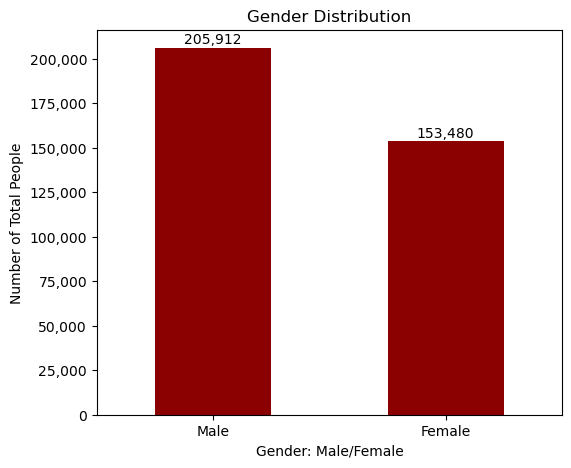

Male      205912
Female    153480
Name: Gender, dtype: int64




([<matplotlib.patches.Wedge at 0x15ae42d84c8>,
 [Text(0.21861722823879948, 0.3349723981422718, 'Male'),
  Text(-0.2459443817686494, -0.37684394791005577, 'Female')],
 [Text(0.6831788382462484, 1.0467887441945993, '57.29%'),
  Text(-0.7105059917760983, -1.0886602939623833, '42.71%')])

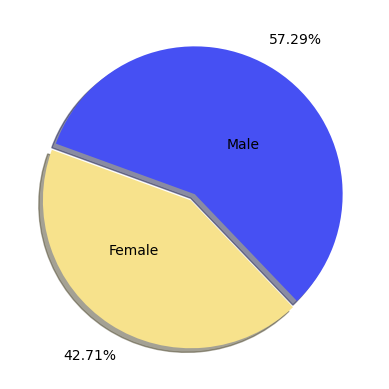

In [36]:
fig = plt.figure(figsize=(6,5))
gender = df["Gender"].value_counts()
ax = gender.plot(kind="bar", rot=0, color="darkred")
ax.set_title("Gender Distribution", y=1)
ax.set_xlabel("Gender: Male/Female")
ax.set_ylabel("Number of Total People")#4650f3
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format('{:,.0f}'.format(y_value))
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom') 


current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

print(df['Gender'].value_counts())
print("\n")
labels = 'Male', 'Female'
explode =(0,0.05)
size = [60, 40]

plt.pie(df['Gender'].value_counts(), explode = explode, labels = labels, colors=['#4650f3', '#f7e28c'],autopct='%1.2f%%', shadow=True,
       counterclock=False,  pctdistance=1.25, labeldistance=.4, startangle = 160)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


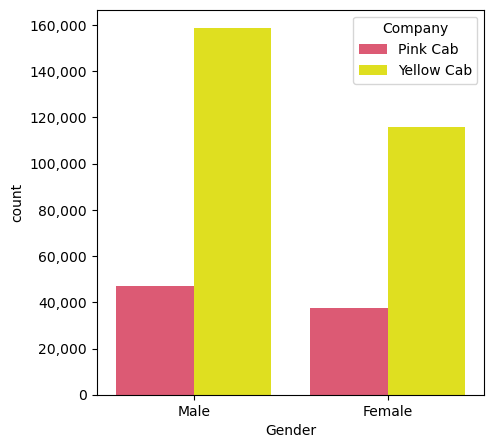

In [37]:
plt.figure(figsize = (5,5))
sns.countplot(x='Gender', hue='Company', data=df, palette=["#f24467", "yellow"])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


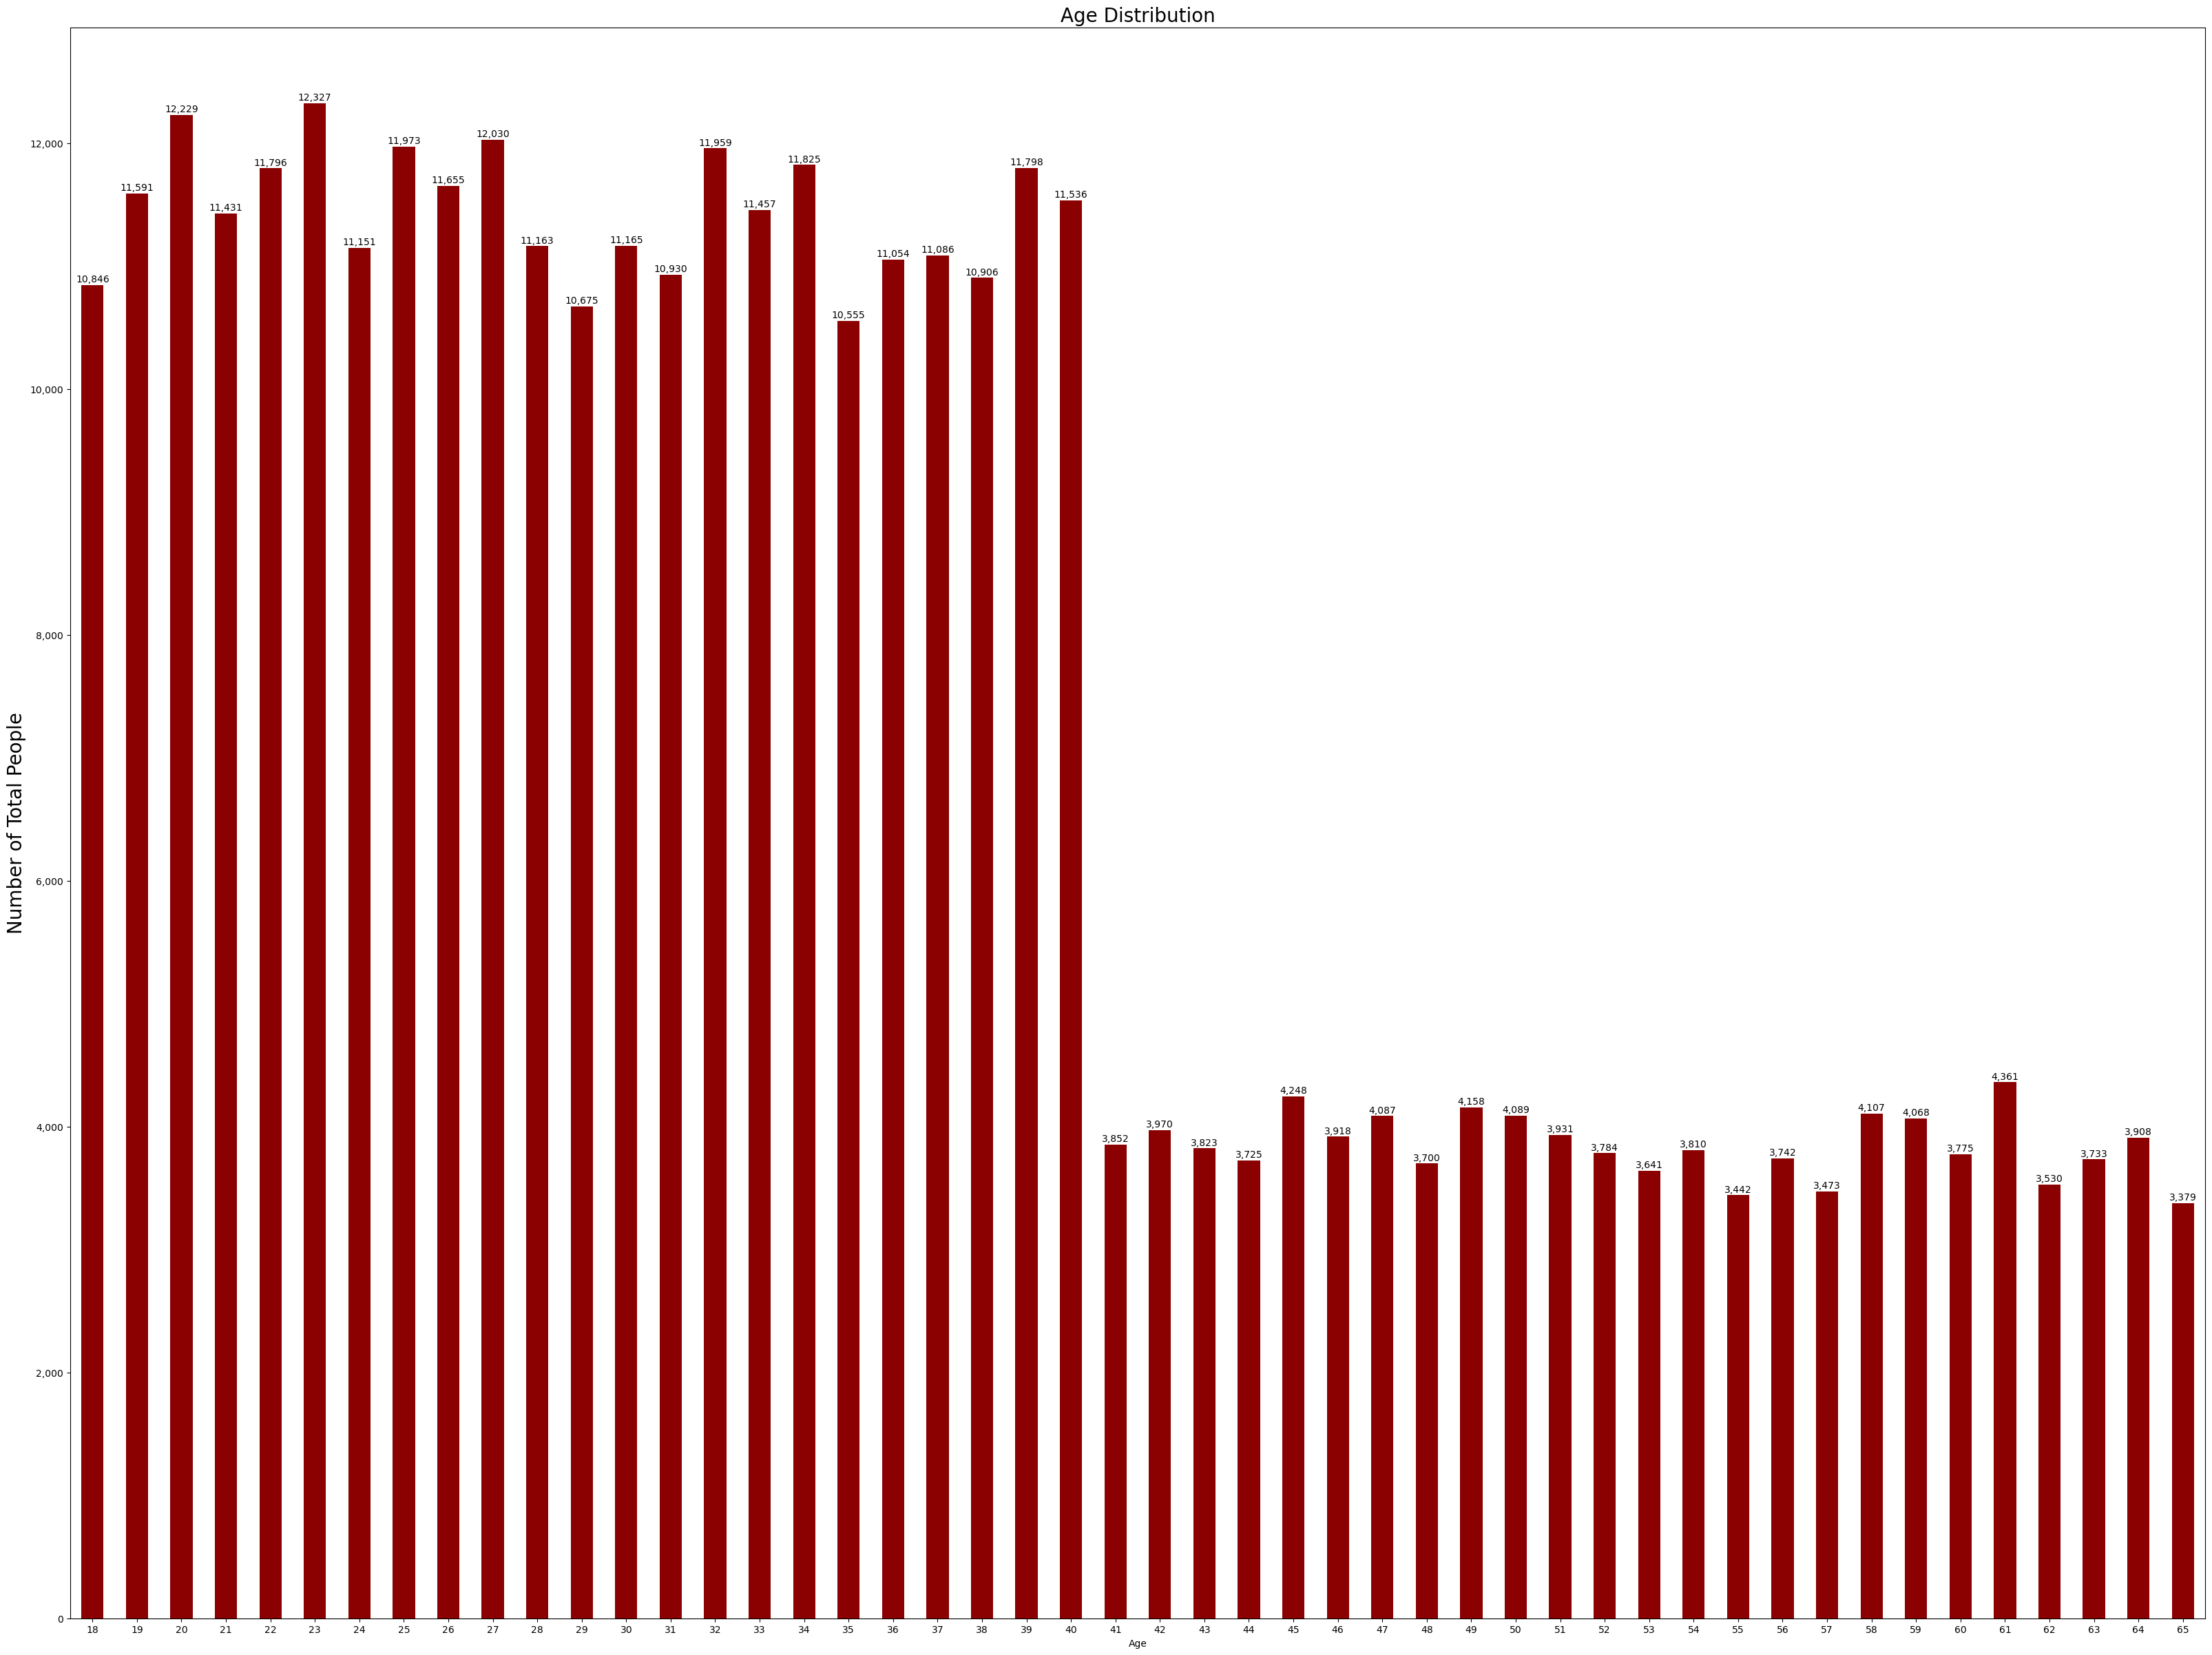

In [38]:
# Age Distribution
import numpy as np
fig = plt.figure(figsize=(40, 30))
gender = df["Age"].value_counts().sort_index()

ax = gender.plot(kind="bar", rot=0, color="darkred")

ax.set_title("Age Distribution", fontsize=20)
ax.set_xlabel("Age")
ax.set_ylabel("Number of Total People", fontsize=20)
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format('{:,.0f}'.format(y_value))
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom') 


current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()


# bins = [18, 25, 35, 40, 45, 50, 55, 65]
# labels =["18-25", "26-35", "36-40", "41-45", "46-50"]
# plt.hist(labels, xlabel='Age Group', ylabel='Frequency')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


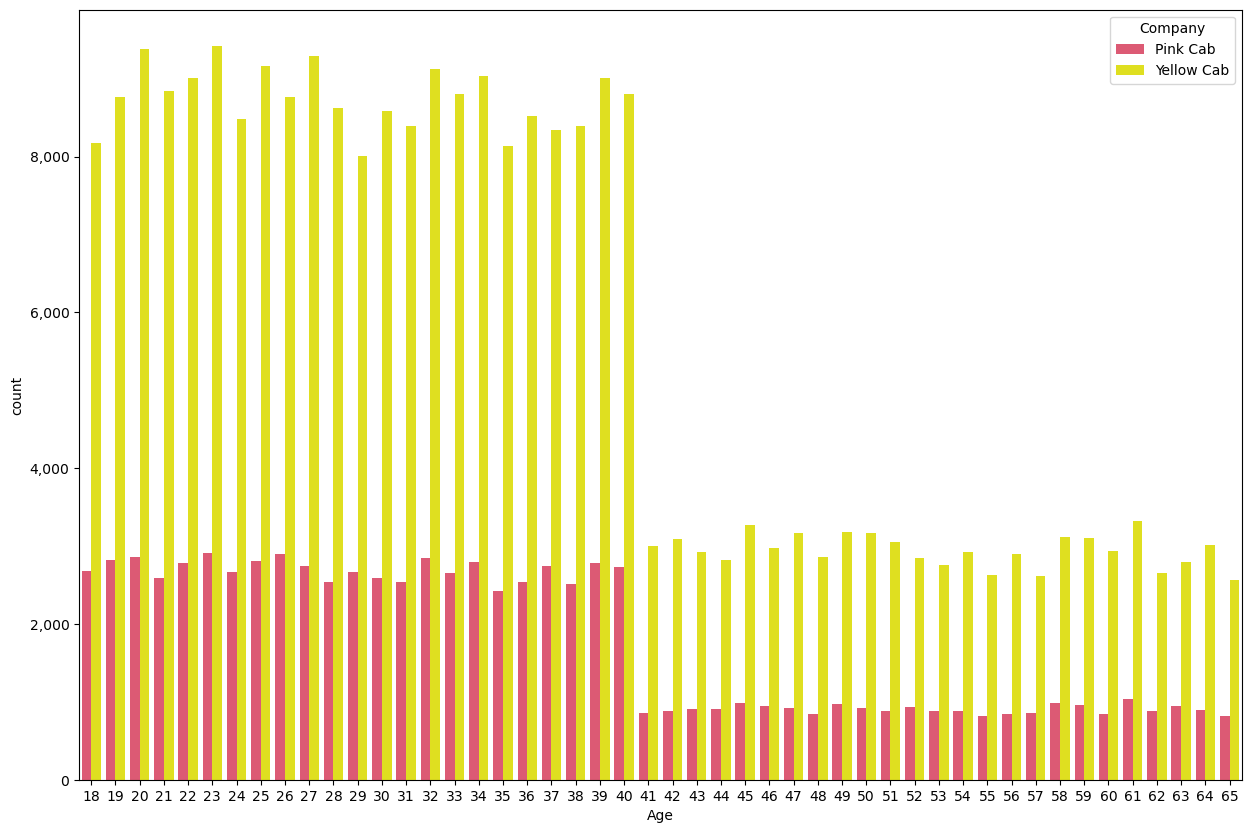

In [39]:
plt.figure(figsize = (15,10))
sns.countplot(x='Age', hue='Company', data=df, palette=["#f24467", "yellow"])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == "":


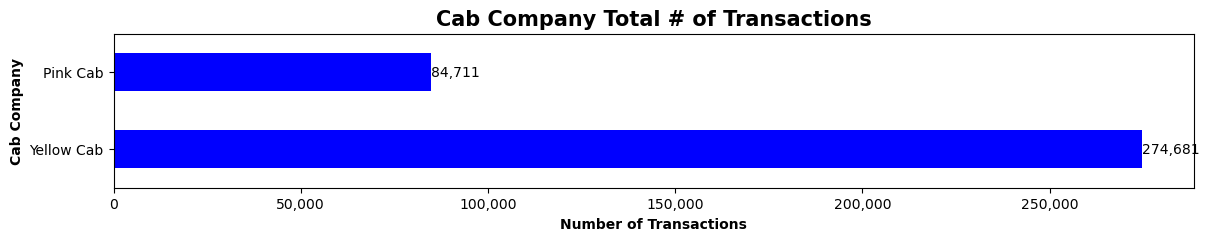

In [40]:
fig = plt.figure(figsize=(16,2))
company = df["Company"].value_counts()
ax = company.plot(kind="barh", rot=0, color="blue")
ax.set_title("Cab Company Total # of Transactions", y=1, fontsize=15, fontweight="bold")
ax.set_xlabel("Number of Transactions", fontweight ="bold", fontsize=10)
ax.set_ylabel("Cab Company", fontweight ="bold", fontsize=10)
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])
fig.subplots_adjust(left=None, bottom=None, right=0.8, top=None, wspace=None, hspace=None)

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

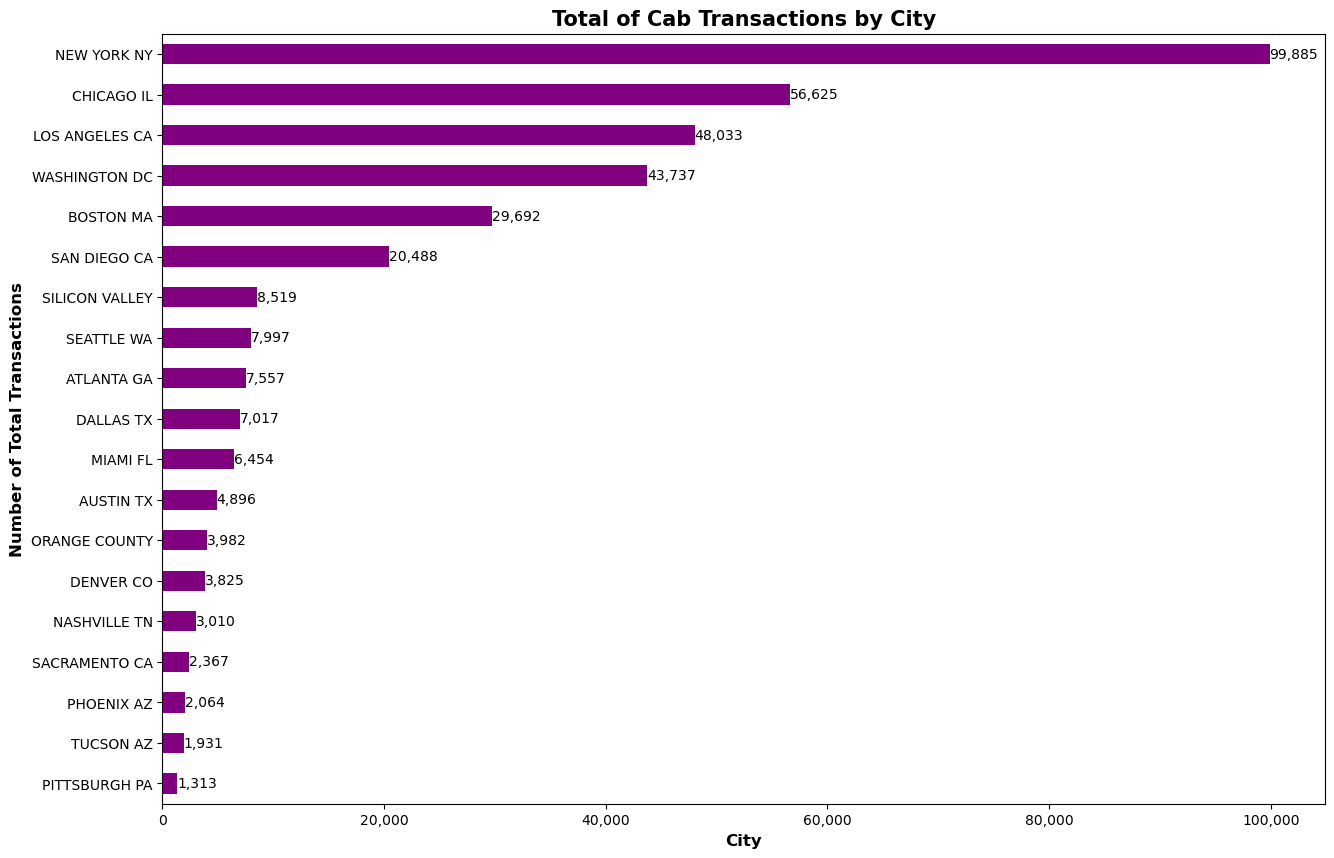

In [41]:
import sys
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(15,10))
total_city_counts = df["City"].value_counts().sort_values() # in Descending order
ax = total_city_counts.plot(kind="barh", rot=0, color="purple")
ax.set_title("Total of Cab Transactions by City", y=1, fontsize=15, fontweight="bold")
ax.set_xlabel("City", fontweight ="bold", fontsize=12)
ax.set_ylabel("Number of Total Transactions", fontweight="bold", fontsize=12)

if __name__ == "__main__":
    ax.set_xticklabels(["0", "20,000", "40,000", "60,000", "80,000", "100,000"])

for bars in ax.containers:
     ax.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])
plt.rcParams["font.weight"] = "bold"
plt.show()

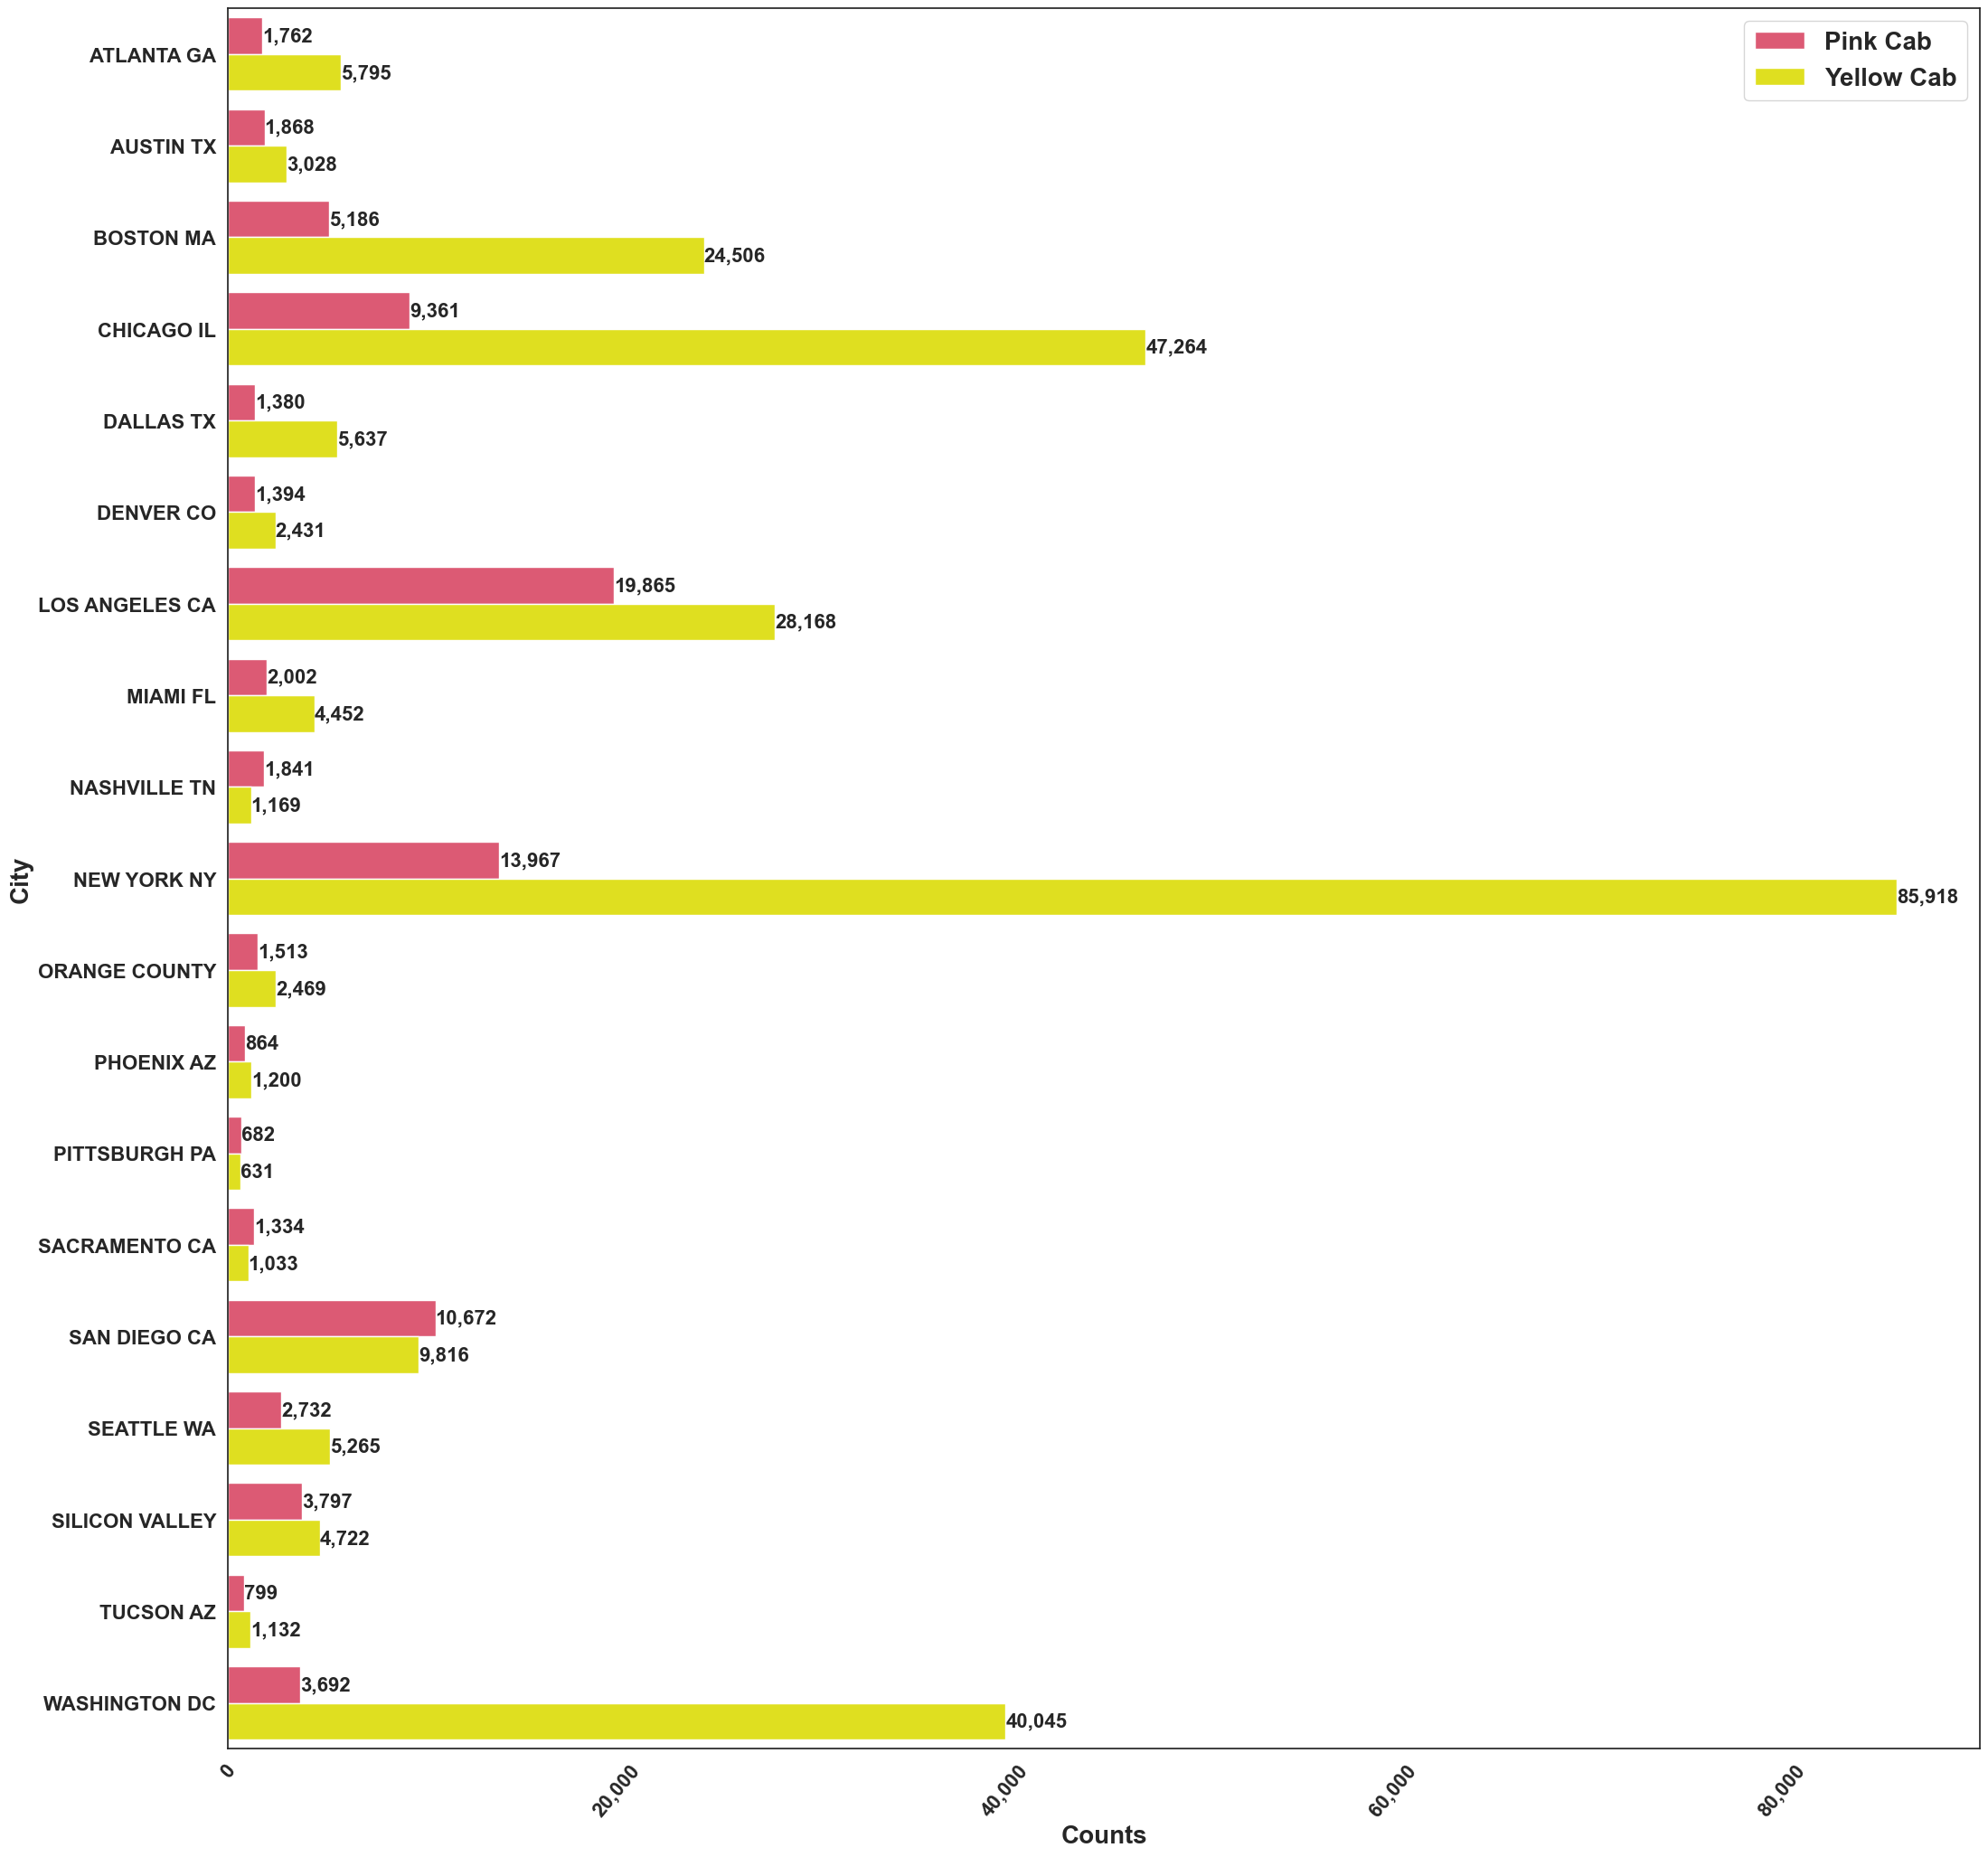

In [42]:
plt.figure(figsize = (25, 25))

sns.set_theme(style="white")
ax = sns.countplot(y ='City', hue = "Company", data = df, palette=["#f24467", "yellow"])

total = df['City'].count()


for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues], fontsize=16)


current_values2 = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values2])

fontsize = 20
plt.legend(loc="upper right", frameon=True, fontsize=fontsize)
plt.xlabel("Counts", fontsize=20, fontweight="bold")
plt.ylabel("City", fontsize=20, fontweight="bold")
ax.set_xlabel('Counts', fontsize=fontsize)
ax.set_ylabel('City', fontsize=fontsize)

plt.xticks(rotation =50, fontsize=16)
plt.yticks(fontsize=16)

plt.rcParams["font.weight"] = "bold"

plt.show()

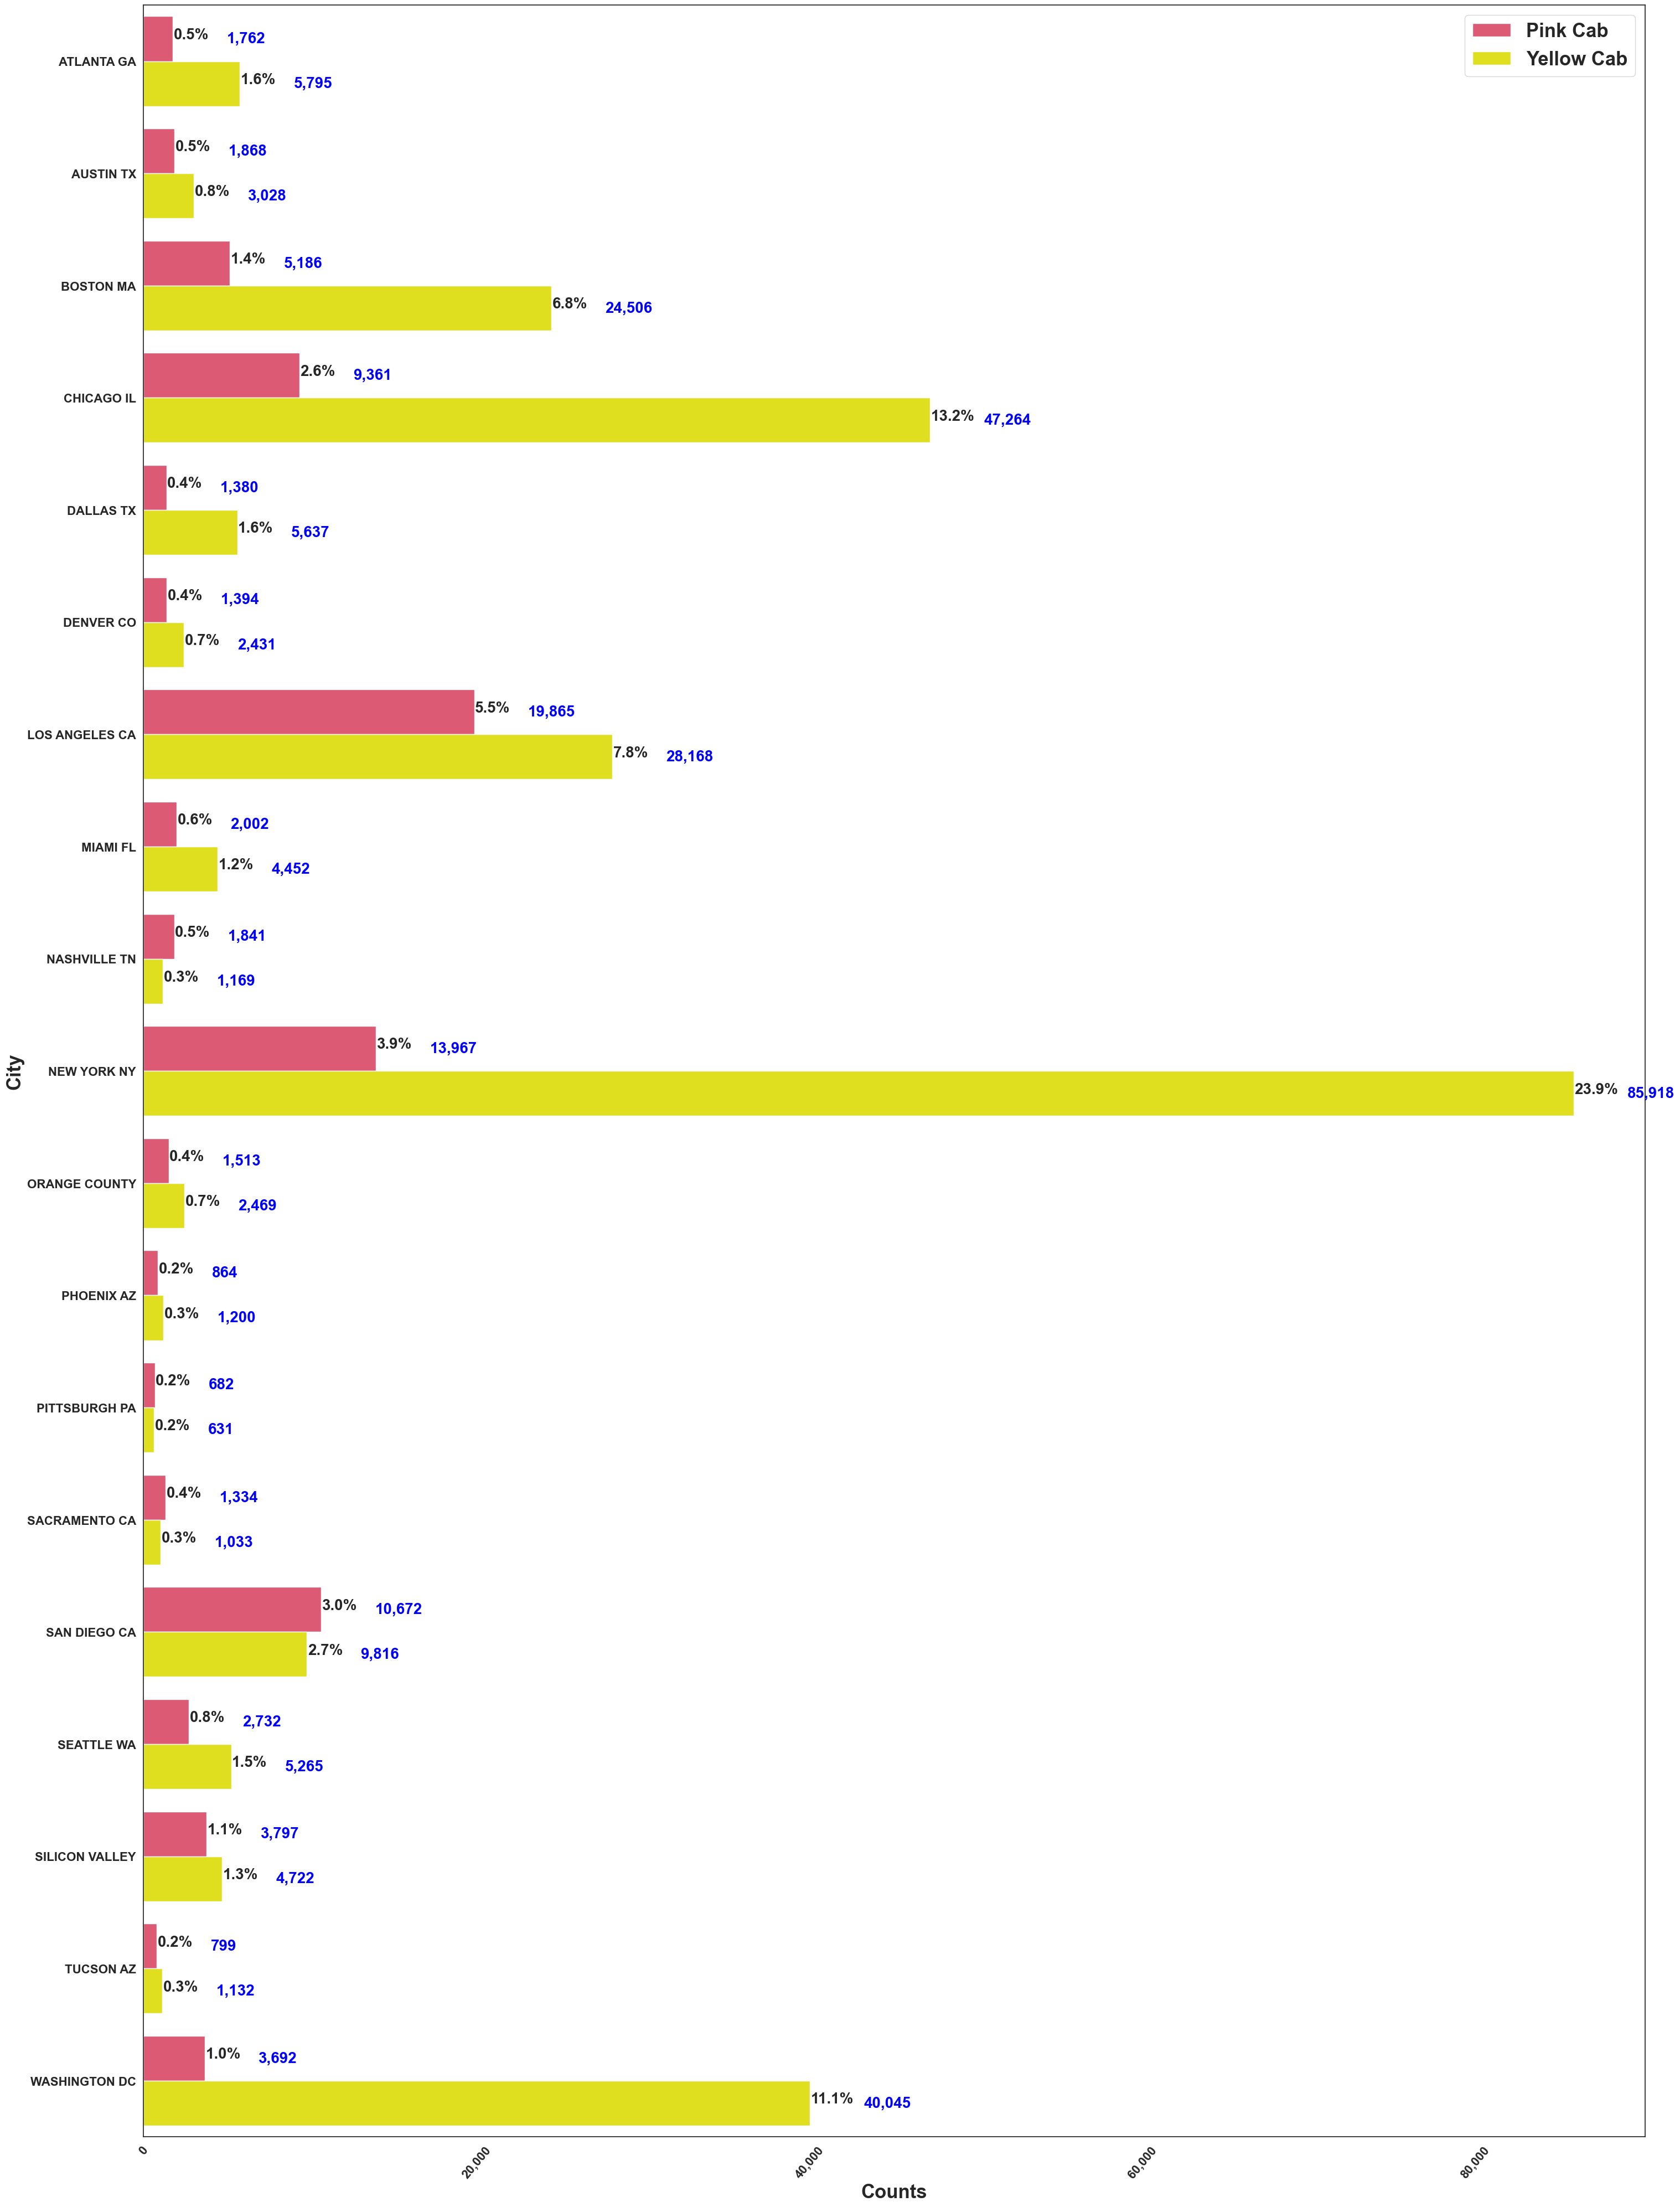

In [43]:
plt.figure(figsize = (35, 50))

sns.set_theme(style="white")
ax = sns.countplot(y ='City', hue = "Company", data = df, palette=["#f24467", "yellow"])

total = df['City'].count()

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 50
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20)

        
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues], fontsize=20, padding=70, color="blue")

current_values2 = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values2], fontsize=16)

fontsize = 25
plt.legend(loc="upper right", frameon=True, fontsize=fontsize)
plt.xlabel("Counts", fontsize=20, fontweight="bold")
plt.ylabel("City", fontsize=20, fontweight="bold")
ax.set_xlabel('Counts', fontsize=fontsize)
ax.set_ylabel('City', fontsize=fontsize)

plt.xticks(rotation =50, fontsize=16)
plt.yticks(fontsize=16)

plt.rcParams["font.weight"] = "bold"

plt.show()

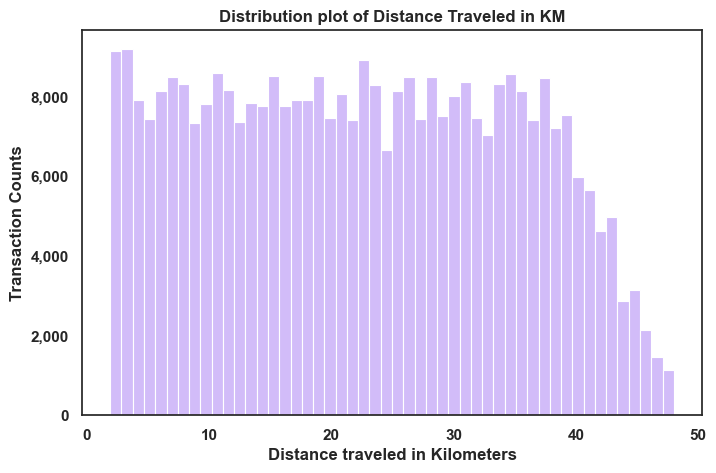

In [44]:
# total distance travelled 
fig = plt.figure(figsize=(8,5))
ax = sns.histplot(data=df, x="KM Travelled", bins = 50, color='#c3a6f7')
ax.set_xlabel(r"Distance traveled in Kilometers", fontweight="bold")
ax.set_ylabel(r"Transaction Counts", fontweight="bold")
plt.title("Distribution plot of Distance Traveled in KM", fontweight="bold")
plt.rcParams["font.weight"] = "bold"

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

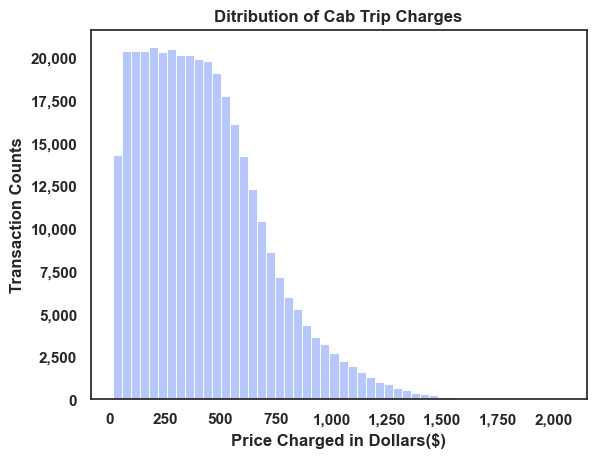

In [45]:
# Total price charged
# total distance travelled 
ax = sns.histplot(data=df, x="Price Charged", bins = 50, color="#9eb5fe")
ax.set_xlabel(r"Price Charged in Dollars($)", fontweight="bold")
ax.set_ylabel(r"Transaction Counts", fontweight="bold")
plt.title("Ditribution of Cab Trip Charges", fontweight="bold")
plt.rcParams["font.weight"] = "bold"

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

current_values2 = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values2])


plt.show()

# Reference:
#1. https://queirozf.com/entries/matplotlib-examples-number-formatting-for-axes-labels

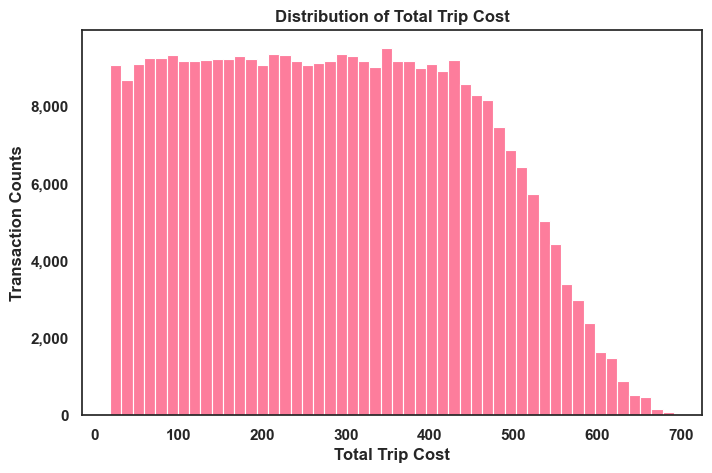

In [46]:
fig = plt.figure(figsize=(8,5))
ax = sns.histplot(data=df, x="Cost of Trip", bins=50, color="#fd527b")
ax.set_xlabel(r"Total Trip Cost", fontweight="bold")
ax.set_ylabel(r"Transaction Counts", fontweight="bold")
plt.title("Distribution of Total Trip Cost", fontweight="bold")
plt.rcParams["font.weight"] = "bold"

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

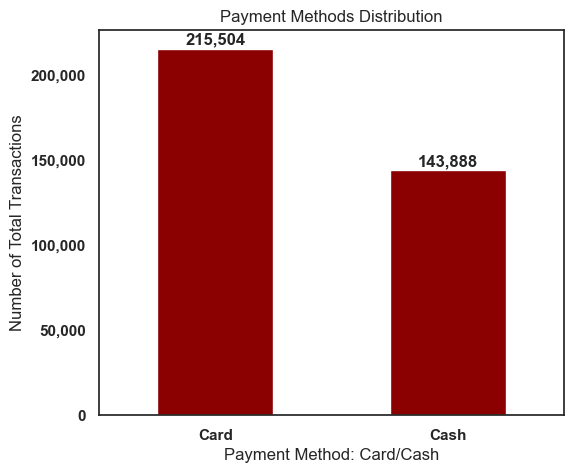

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64




([<matplotlib.patches.Wedge at 0x15aeb9ed608>,
 [Text(0.3911634053605675, 0.08361333809102695, 'Card'),
  Text(-0.4400588310306384, -0.0940650053524052, 'Cash')],
 [Text(1.2223856417517733, 0.26129168153445914, '59.96%'),
  Text(-1.2712810674218442, -0.27174334879583717, '40.04%')])

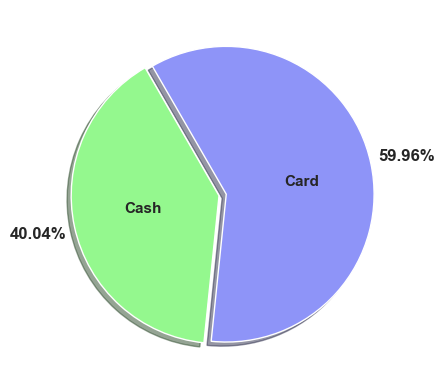

In [47]:
# Method of Payment Distribution
fig = plt.figure(figsize=(6,5))
gender = df["Payment_Mode"].value_counts()
ax = gender.plot(kind="bar", rot=0, color="darkred")
ax.set_title("Payment Methods Distribution", y=1)
ax.set_xlabel("Payment Method: Card/Cash")
ax.set_ylabel("Number of Total Transactions")

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label =  label = format('{:,.0f}'.format(y_value))
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom') 

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

print(df['Payment_Mode'].value_counts())
print("\n")
labels = 'Card', 'Cash'
explode =(0,0.05)
size = [60, 40]

plt.pie(df['Payment_Mode'].value_counts(), explode = explode, labels = labels, colors=['#8e94f8', '#94f88e'],autopct='%1.2f%%', shadow=True,
       counterclock=False,  pctdistance=1.25, labeldistance=.4, startangle = 120)

In [48]:
df.dtypes

Transaction ID          int64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Population              int32
Users                   int32
dtype: object

In [49]:
# # Create a Pie chart of users distribution in each city
# colors = sns.color_palette('husl')
# plt.figure(figsize=(15,15))
# plt.pie(df["Users"], labels = df["City"], colors = colors, autopct='%.0f%%')
# plt.show()

In [50]:
# Create a new column named Net Profit by subtracting Price Charged from Cost of Trip
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit
0,10000011,29290,Card,Male,28,10813,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,57.3150
1,10351127,29290,Cash,Male,28,10813,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,281.2772
2,10412921,29290,Card,Male,28,10813,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,194.6480
3,10000012,27703,Card,Male,27,9237,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,23.6660
4,10320494,27703,Card,Male,27,9237,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,Female,42,19417,1/7/2018,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,671238,25063,47.2656
359388,10439799,12490,Cash,Male,33,18713,1/3/2018,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,1177609,27247,105.0980
359389,10439838,41414,Card,Male,38,3960,1/4/2018,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,631442,5712,71.2100
359390,10439840,41677,Cash,Male,23,19454,1/6/2018,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,631442,5712,21.8600


In [51]:
df.dtypes

Transaction ID          int64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Population              int32
Users                   int32
Profit                float64
dtype: object

In [52]:
#create new dataframes profitByCity, profitByYellowCab, profitByPinkCab
profitByCity = df.groupby(["City", "Company"], as_index=False)["Profit"].sum()
profitByYellowCab = profitByCity[profitByCity["Company"] == "Yellow Cab"]
profitByRedCab = profitByCity[profitByCity["Company"] == "Pink Cab"]

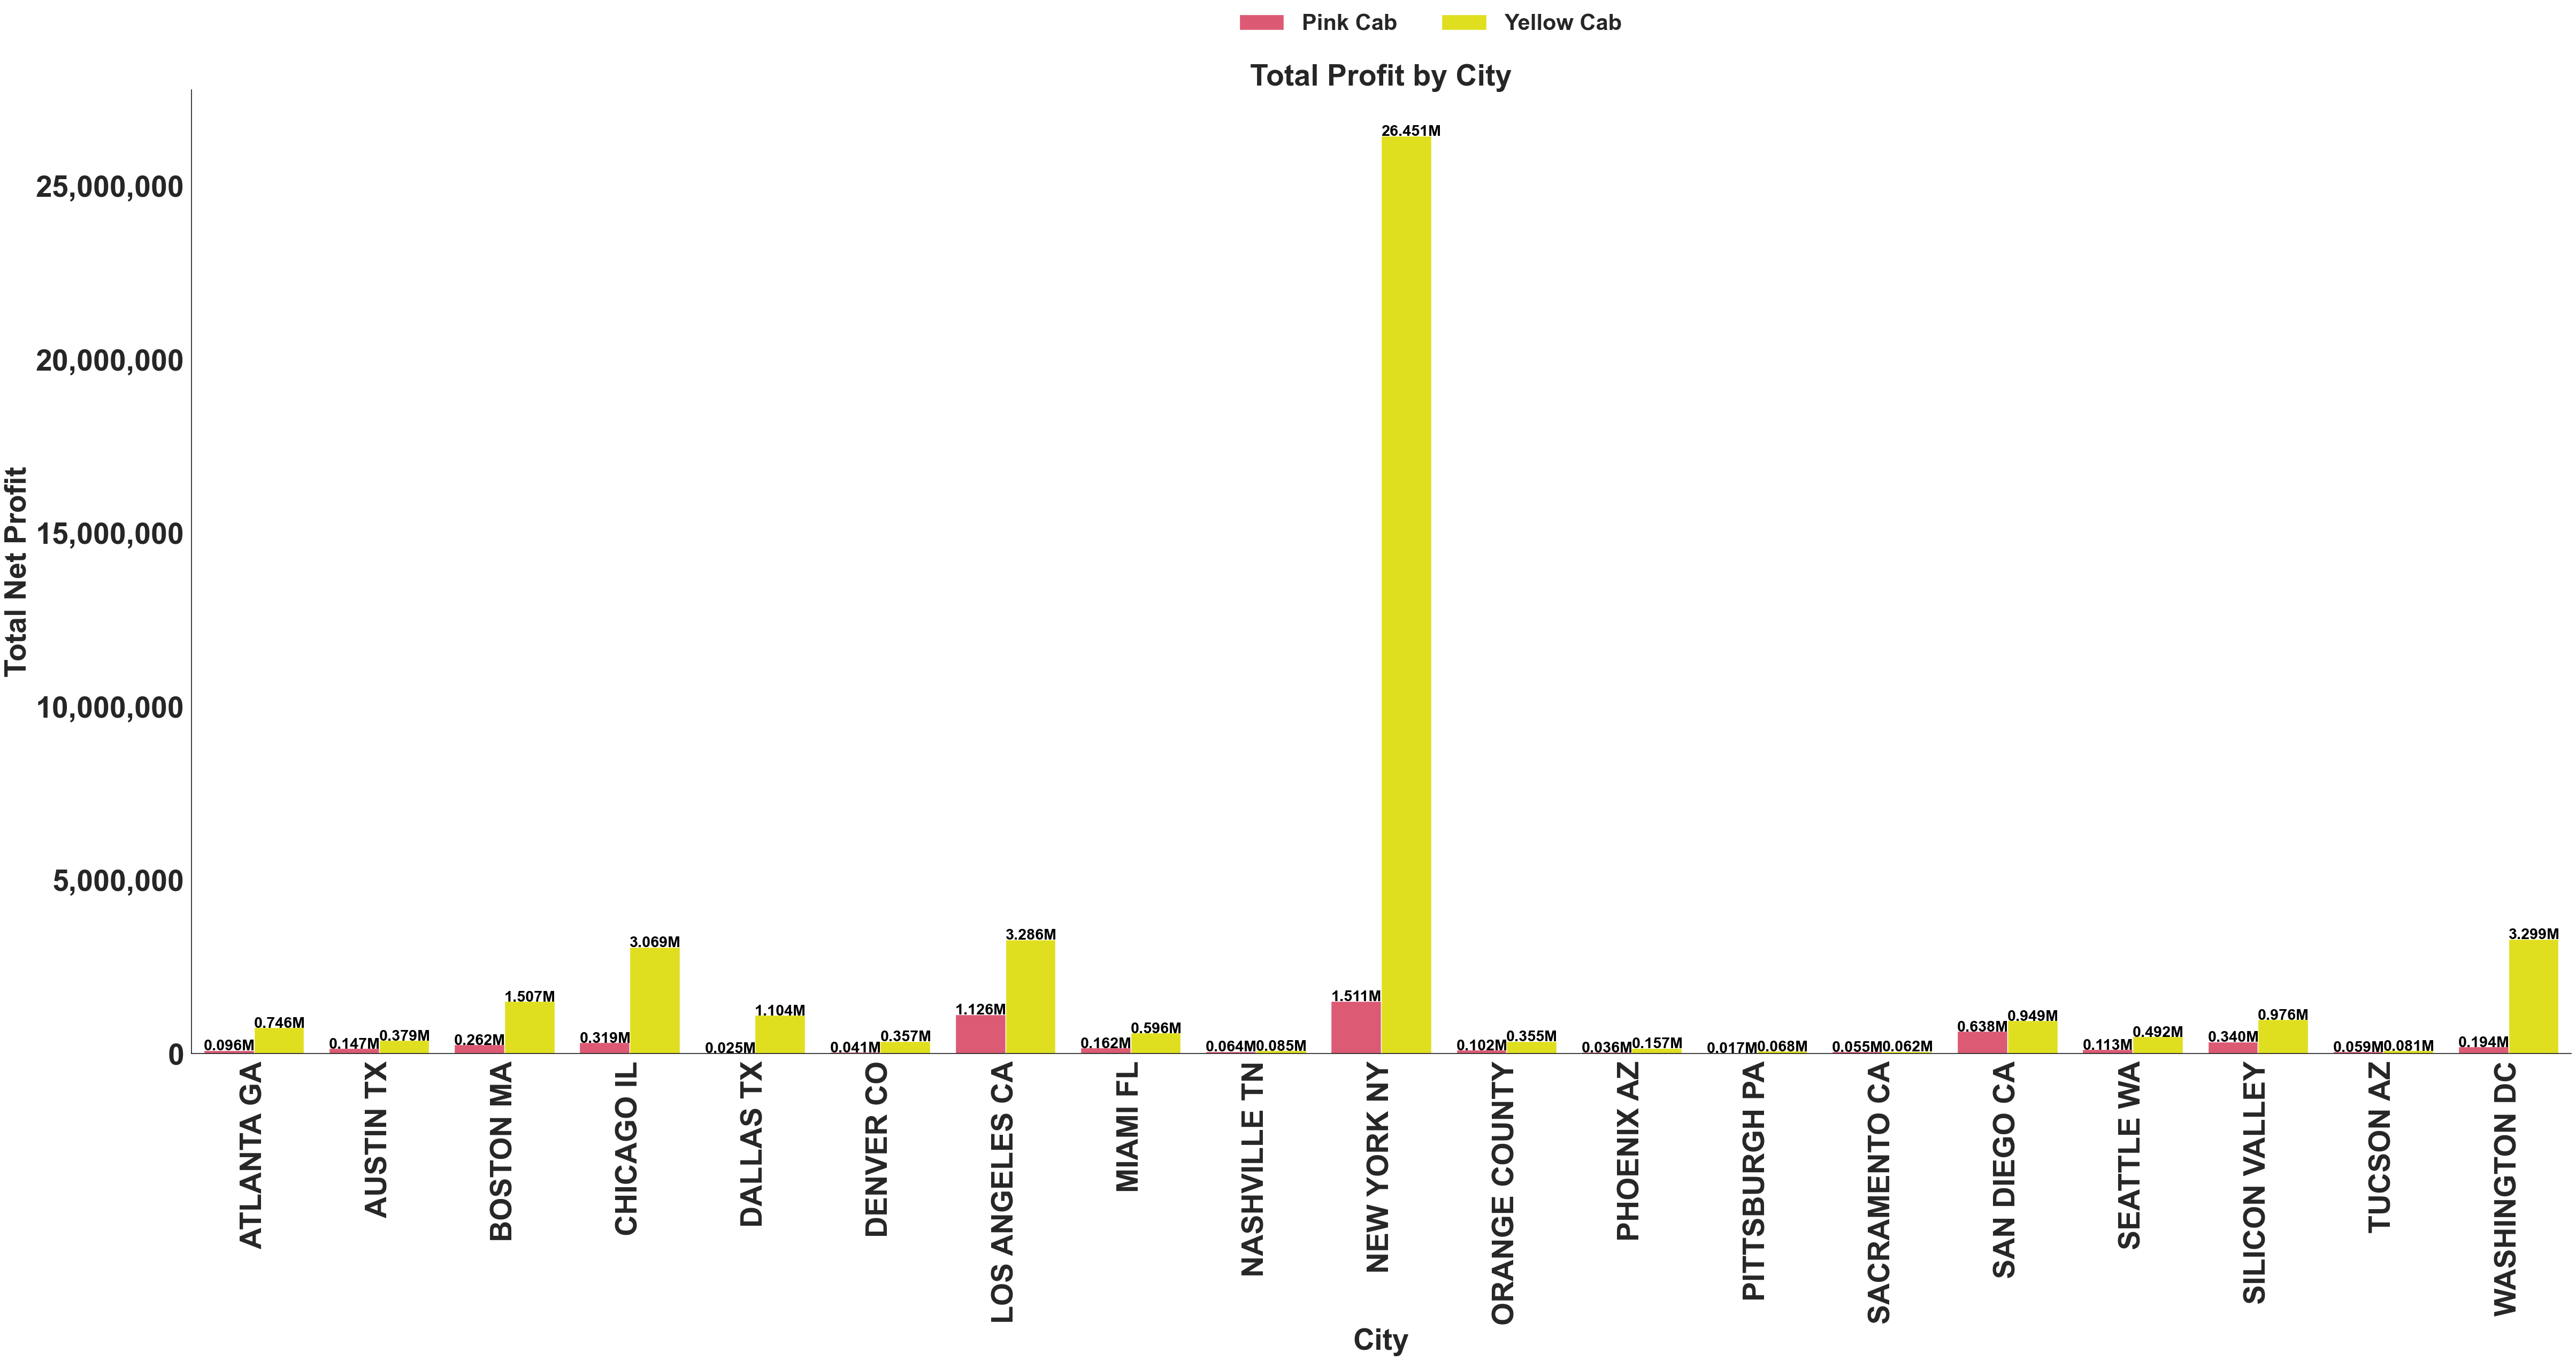

In [53]:
ax = sns.catplot(data = profitByCity, x = "City", y = "Profit", hue = "Company", kind = "bar", legend = True, height=10,
                 palette=["#f24467", "yellow"], aspect=2)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False, fontsize=30)

plt.xticks(rotation = 90)

ax.fig.set_size_inches(50,20)


plt.title("Total Profit by City", fontsize=40, fontweight="bold")
# iterate through axes
ax = ax.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height() + 30 , 
           '{0:.3f}M'.format(p.get_height()/1000000),   #Used to format it Million representation
            color='black', 
            rotation='horizontal', 
            size='xx-large')
    
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.xlabel("City", fontsize=40, fontweight="bold")
plt.ylabel("Total Net Profit",fontsize=40, fontweight="bold")



plt.rcParams["figure.autolayout"] = True
spacing = 0.550
fig.subplots_adjust(bottom=spacing)

plt.show()

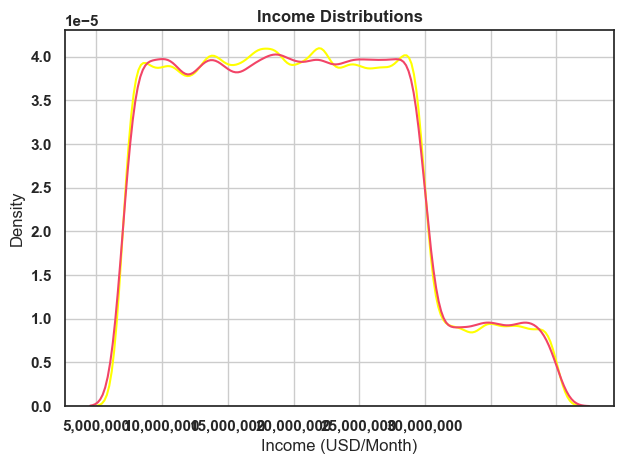

In [54]:
from matplotlib.lines import Line2D
yellowCabTransactions = df[df["Company"] == "Yellow Cab"] 
pinkCabTransactions = df[df["Company"] == "Pink Cab"]

sns.distplot(yellowCabTransactions["Income (USD/Month)"], hist=False, color = "yellow")
sns.distplot(pinkCabTransactions["Income (USD/Month)"], hist=False, color = "#f24467")

plt.title("Income Distributions", fontweight="bold")
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')


plt.rcParams["figure.autolayout"] = True
spacing = 0.550
fig.subplots_adjust(bottom=spacing)

plt.grid(True)

[Text(0.0, 0, '0'),
 Text(2000.0, 0, '2,000'),
 Text(4000.0, 0, '4,000'),
 Text(6000.0, 0, '6,000'),
 Text(8000.0, 0, '8,000'),
 Text(10000.0, 0, '10,000'),
 Text(12000.0, 0, '12,000'),
 Text(14000.0, 0, '14,000'),
 Text(16000.0, 0, '16,000'),
 Text(18000.0, 0, '18,000')]

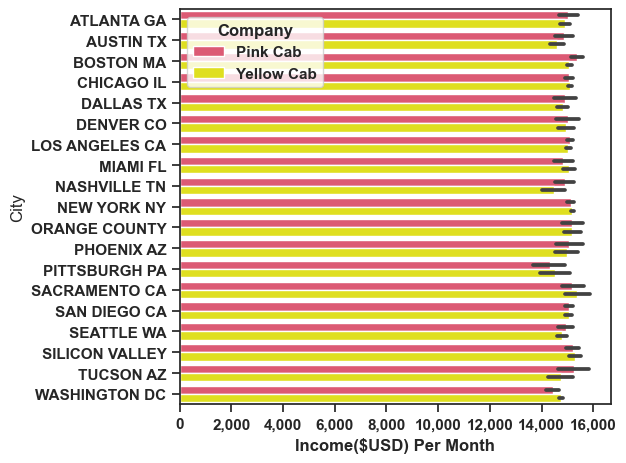

In [55]:
# Income Distribution

sns.set_theme(style="ticks", palette=["#f24467", "yellow"])
sns.barplot(x="Income (USD/Month)",y="City", hue="Company", data=df)

current_values = plt.gca().get_xticks()
plt.xlabel("Income($USD) Per Month", fontsize=12, fontweight="bold")

plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

Text(0.5, 1.0, 'Pencentage of Users(Users vs. Population) by City')

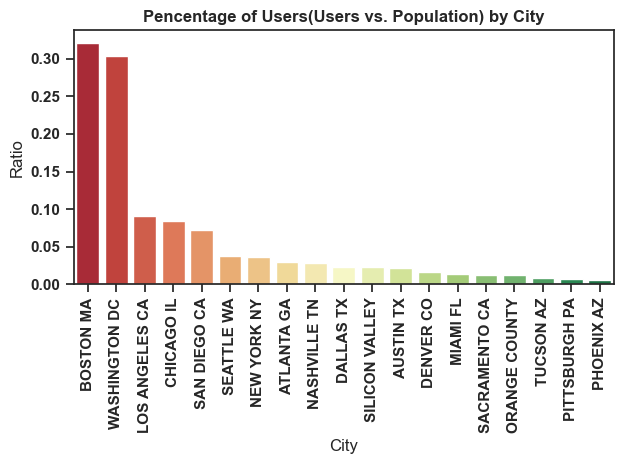

In [56]:
df["Ratio"] = df["Users"]/ df["Population"]
df = df.sort_values('Ratio', ascending=False)
sns.barplot(data = df, x = "City", y = "Ratio",palette="RdYlGn")
plt.xticks(rotation = 90)
plt.title("Pencentage of Users(Users vs. Population) by City", fontweight ="bold")

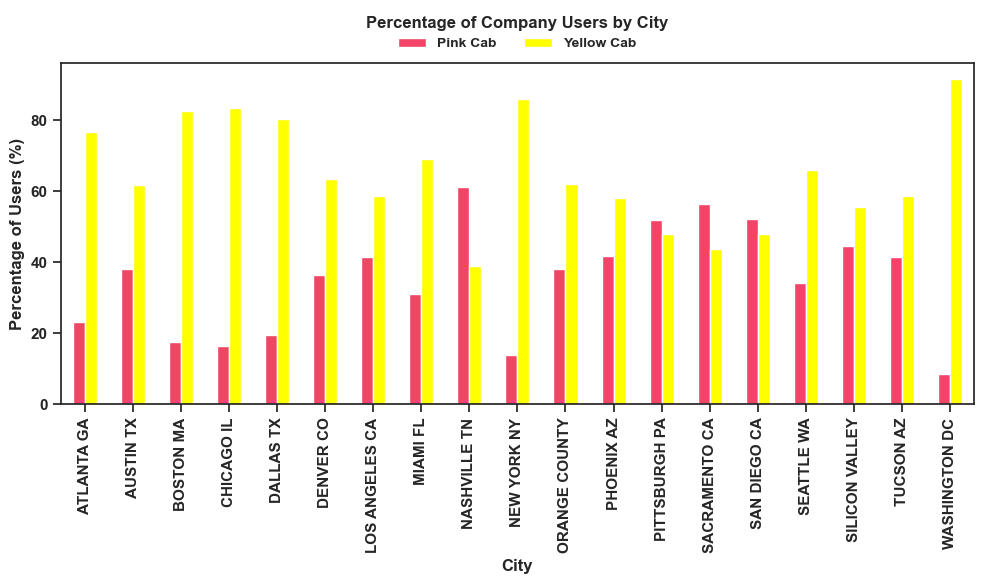

In [57]:
user_population = df.groupby(['City', 'Company'])['Users'].count() / df.groupby(['City'])['Users'].count() * 100
df_percentage = user_population.reset_index()
df_percentage = df_percentage.rename(columns={'Users': 'Percentage of Users'})
fig, ax = plt.subplots(figsize=(10, 6))
df_percentage.pivot(index='City', columns='Company', values='Percentage of Users').plot.bar(ax=ax, color=['#f24467', 'yellow'])

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title="Percentage of Company Users by City", frameon=False, fontsize=10)

plt.ylabel("Percentage of Users (%)", fontweight ="bold")
plt.xlabel("City", fontweight="bold")
plt.xticks(rotation=90)

plt.show()

## Check Profits by each cab company

In [58]:
import sys
from colorama import init, AnsiToWin32
from IPython.display import display, HTML

# Calculate profits of each cab company
pinkCabProfits = df[df['Company'] == "Pink Cab"]['Profit'].sum()
yellowCabProfits = df[df['Company'] == "Yellow Cab"]["Profit"].sum()

# Calculate total # of rides of each cab company
pinkCabRides = df[df['Company'] == "Pink Cab"]['Company'].count()
yellowCabRides = df[df['Company'] == "Yellow Cab"]['Company'].count()

# Calculate profit per ride by company
pinkCabProfitPerRide = pinkCabProfits / pinkCabRides
yellowCabProfitPerRide = yellowCabProfits / yellowCabRides

# Calculate Total Distance(KM) Travelled by company
pinkCabDistance = df[df['Company'] == 'Pink Cab']['KM Travelled'].sum()
yellowCabDistance = df[df['Company'] == 'Yellow Cab']['KM Travelled'].sum()

# Calculate profit per kilometers travelled by company
pinkCabProfitPerKM = pinkCabProfits/ pinkCabDistance
yellowCabProfitPerKM = yellowCabProfits/yellowCabDistance

# Create a new dataframe to group above data information
profits_df = pd.DataFrame({'Company': ['Pink Cab', 'Yellow Cab'], 
             'Total Profits: ': ['${:,.0f}'.format(pinkCabProfits), '${:,.0f}'.format(yellowCabProfits)],
             'Total Rides:': ['{:,.0f}'.format(pinkCabRides), '{:,.0f}'.format(yellowCabRides)],
             'Total Distance Traveled(KM)': ['{:,.0f}'.format(pinkCabDistance), '{:,.0f}'.format(yellowCabDistance)],
             'Average Profits Per Ride:': ['${:,.03f}'.format(pinkCabProfitPerRide), '${:,.03f}'.format(yellowCabProfitPerRide)],
             'Average Profits Per KM: ': ['${:,.03f}'.format(pinkCabProfitPerKM), '${:,.03f}'.format(yellowCabProfitPerKM)]})
profits_df

# Display the summary table in bold style
def df_style(val):
    return "font-weight: bold"
summaryStyled = profits_df.style.applymap(df_style)
#display(summaryStyled)

    
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "font-style: italic; color: darkgrey; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #800000; color: white;"
}
profits_df.style.set_table_styles([cell_hover, index_names, headers])


profits_df.style.set_table_styles(
    [
        {
            'selector': 'tr:nth-child(even)',
            'props': 'background-color: yellow;'

        }
    ]
)
profits_df.set_index('Company', inplace=True)

c1 = 'background-color: #f24467; font-weight: bold'
c2 = 'background-color: yellow; font-weight: bold'
d={'Pink Cab': c1, 'Yellow Cab':c2}

profits_df.style.apply(lambda x: x.index.map(d))


,Total Profits:,Total Rides:,Total Distance Traveled(KM),Average Profits Per Ride:,Average Profits Per KM:
Company,,,,,
Pink Cab,"$5,307,328","84,711","1,911,073",$62.652,$2.777
Yellow Cab,"$44,020,373","274,681","6,199,417",$160.260,$7.101


In [59]:
profits_df.iloc[:1]

,Total Profits:,Total Rides:,Total Distance Traveled(KM),Average Profits Per Ride:,Average Profits Per KM:
Company,,,,,
Pink Cab,"$5,307,328","84,711","1,911,073",$62.652,$2.777


In [60]:
profits_df.iloc[1:]

,Total Profits:,Total Rides:,Total Distance Traveled(KM),Average Profits Per Ride:,Average Profits Per KM:
Company,,,,,
Yellow Cab,"$44,020,373","274,681","6,199,417",$160.260,$7.101


In [61]:
profits_df.iloc[1:2,:1]

,Total Profits:
Company,
Yellow Cab,"$44,020,373"


In [62]:
profits_df.iloc[:2, [0] ]

,Total Profits:
Company,
Pink Cab,"$5,307,328"
Yellow Cab,"$44,020,373"


In [63]:
profits_df.take([0], axis=1)

,Total Profits:
Company,
Pink Cab,"$5,307,328"
Yellow Cab,"$44,020,373"


## Check Total Cost Per Trip By Company and Average Cost Per Ride

In [64]:
# Calculate total cost of each Cab Company
pinkCabTotalCosts = df[df['Company']=="Pink Cab"]['Cost of Trip'].sum()
yellowCabTotalCosts = df[df['Company'] == 'Yellow Cab']['Cost of Trip'].sum()

# Calculate average cost of trip by each Cab Company
pinkCabCostPerRide = pinkCabTotalCosts/ pinkCabRides
yellowCabCostPerRide = yellowCabTotalCosts / yellowCabRides

# Caclculate average cost of distance by each Cab Company
pinkCabCostPerKM = pinkCabTotalCosts/ pinkCabDistance
yellowCabCostPerKM = yellowCabTotalCosts / yellowCabDistance

# Create a new dataframe to group above data information
costs_df = pd.DataFrame({'Company': ['Pink Cab', 'Yellow Cab'], 
             'Total Costs: ': ['${:,.0f}'.format(pinkCabTotalCosts), '${:,.0f}'.format(yellowCabTotalCosts)],
             'Total Rides:': ['{:,.0f}'.format(pinkCabRides), '{:,.0f}'.format(yellowCabRides)],
             'Total Distance Traveled(KM)': ['{:,.0f}'.format(pinkCabDistance), '{:,.0f}'.format(yellowCabDistance)],
             'Average Costs Per Ride:': ['${:,.03f}'.format(pinkCabCostPerRide), '${:,.03f}'.format(yellowCabCostPerRide)],
             'Average Costs Per KM: ': ['${:,.03f}'.format(pinkCabCostPerKM), '${:,.03f}'.format(yellowCabCostPerKM)]})
costs_df

# Display the summary table in bold style
def df_style(val):
    return "font-weight: bold"
summaryStyled = costs_df.style.applymap(df_style)
#display(summaryStyled)

costs_df.style.apply(summaryStyled, axis=1)

costs_df.style.set_table_styles(
    [
        {
            'selector': 'tr:nth-child(even)',
            'props': 'background-color: yellow;'
    
        }
    ]
)

costs_df.set_index('Company', inplace=True)

c1 = 'background-color: #f24467; font-weight: bold'
c2 = 'background-color: yellow; font-weight: bold'
d={'Pink Cab': c1, 'Yellow Cab':c2}

costs_df.style.apply(lambda x: x.index.map(d))

,Total Costs:,Total Rides:,Total Distance Traveled(KM),Average Costs Per Ride:,Average Costs Per KM:
Company,,,,,
Pink Cab,"$21,020,923","84,711","1,911,073",$248.149,$11.000
Yellow Cab,"$81,833,514","274,681","6,199,417",$297.922,$13.200


## Statistical Analysis and The Moving Average

In [65]:
from IPython.display import Image
Image(url="https://www.dummies.com/wp-content/uploads/250709.image0.jpg")


In [66]:
Image(url="https://www.dummies.com/wp-content/uploads/250714.image0.jpg")

In [67]:
df['Year'] = pd.DatetimeIndex(df['Date of Travel']).year
df['Month'] = pd.DatetimeIndex(df['Date of Travel']).month
df['Day'] = pd.DatetimeIndex(df['Date of Travel']).day
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Ratio,Year,Month,Day
107161,10338876,59426,Card,Male,38,4969,6/16/2018,Yellow Cab,BOSTON MA,33.99,474.08,489.4560,248968,80021,-15.3760,0.321411,2018,6,16
254287,10076478,57311,Card,Male,33,13739,9/20/2016,Yellow Cab,BOSTON MA,35.64,672.79,479.0016,248968,80021,193.7884,0.321411,2016,9,20
254303,10109162,58387,Cash,Female,32,20251,11/20/2016,Pink Cab,BOSTON MA,45.63,664.66,529.3080,248968,80021,135.3520,0.321411,2016,11,20
254302,10070475,58387,Cash,Female,32,20251,9/2/2016,Yellow Cab,BOSTON MA,18.81,311.84,225.7200,248968,80021,86.1200,0.321411,2016,9,2
254301,10038893,58387,Cash,Female,32,20251,5/28/2016,Yellow Cab,BOSTON MA,9.44,152.90,129.1392,248968,80021,23.7608,0.321411,2016,5,28


In [68]:
#df.iloc[:,[6]]

In [69]:
#profit analysis
totalProfitByYear = df.groupby(['Year', 'Company'])['Profit'].sum()
totalProfitByYear = pd.DataFrame(totalProfitByYear)
totalProfitByYear['Profit'] = totalProfitByYear.apply(lambda x: "${:,}".format(x['Profit']), axis=1)
totalProfitByYear

Profit
Year Company                     
2016 Pink Cab      $1,713,511.224
     Yellow Cab  $13,926,995.4316
2017 Pink Cab      $2,033,654.908
     Yellow Cab   $16,575,977.968
2018 Pink Cab      $1,560,162.189
     Yellow Cab  $13,517,399.7712

<AxesSubplot:ylabel='Profit'>

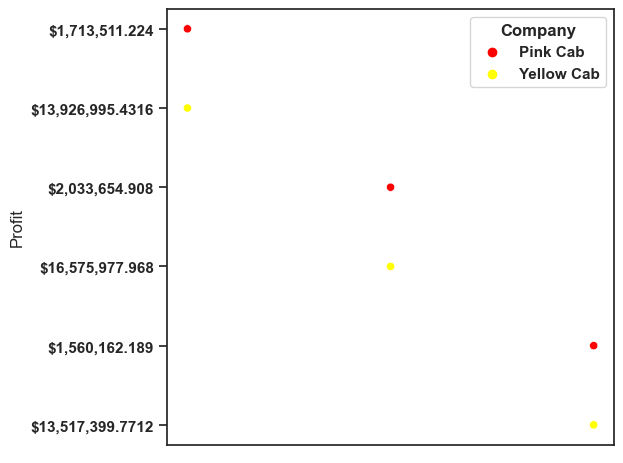

In [70]:
# Plot the total Profits by Year
sns.scatterplot(data=totalProfitByYear,x=pd.to_datetime([2016, 2016,2017, 2017,2018, 2018]), y='Profit', hue='Company', palette=['red', 'yellow'])


## Calculate and Plot Moving Average Trend and Check for Seasonality

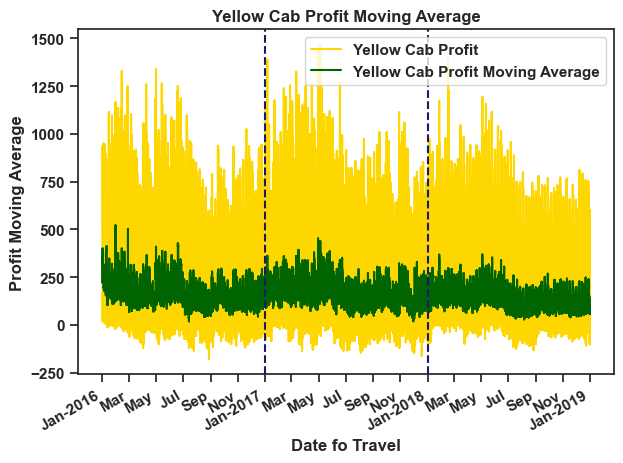

<Figure size 2500x2000 with 0 Axes>

In [83]:
# Convert string data type into datetime object
df[['Date of Travel']] = df[['Date of Travel']].apply(pd.to_datetime)

# Extract and create Yellow Cab Date of Travel Time Series data
df_yellowCab = df[df['Company'] == "Yellow Cab"].sort_values(by='Date of Travel', ascending=True)

yellowCabSeason = df_yellowCab[['Date of Travel', 'Profit']]
yellowCabSeason.columns = ['ds', 'y']
yellowCabSeason = yellowCabSeason.sort_values('ds', ascending=True)

# 30-day rolling window
yellowCabSeason['moving_averge'] = yellowCabSeason['y'].rolling(window=30).mean()

#Plot the Yellow Cab Moving Average trend
ax = yellowCabSeason.plot(x='ds', y=['y', 'moving_averge'],label=['Yellow Cab Profit', 'Yellow Cab Profit Moving Average'], 
                    color =["gold", "darkgreen"])

dashed_lines = ['2017-01-01', '2018-01-01']

for xc in dashed_lines:
    plt.axvline(x=xc, color='midnightblue', linestyle='--')

#Customize x-axis timeline
    
pos = ['2016-01-01', '2016-03-01', '2016-05-01', '2016-07-01', '2016-09-01', 
       '2016-11-01', '2017-01-01', '2017-03-01', '2017-05-01', '2017-07-01',
       '2017-09-01', '2017-11-01', '2018-01-01', '2018-03-01', '2018-05-01',
       '2018-07-01', '2018-09-01', '2018-11-01', '2019-01-01']

lab = ['Jan-2016', 'Mar', 'May', 'Jul', 'Sep', 'Nov', 'Jan-2017', 'Mar', 'May', 'Jul', 'Sep', 'Nov', 'Jan-2018',
       'Mar', 'May', 'Jul', 'Sep', 'Nov', 'Jan-2019']

plt.xticks(pos, lab)
    
plt.title('Yellow Cab Profit Moving Average', fontweight='bold')
plt.ylabel('Profit Moving Average', fontweight="bold")
plt.xlabel('Date fo Travel', fontweight="bold")
plt.figure(figsize=(25,20))



plt.show()

# Reference
# 1. https://www.geeksforgeeks.org/how-to-sort-a-pandas-dataframe-by-date/
# 2. https://www.geeksforgeeks.org/how-to-make-a-time-series-plot-with-rolling-average-in-python/

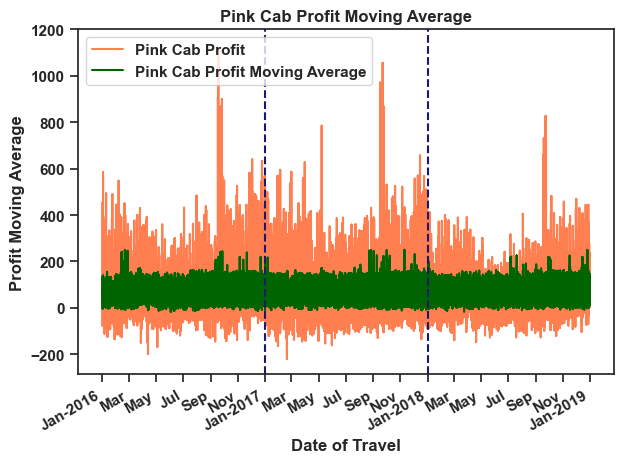

<Figure size 2500x2000 with 0 Axes>

In [93]:
from pylab import plot, ylim, xlim, show, xlabel, ylabel, grid

df_pinkCab = df[df['Company'] == "Pink Cab"]

pinkCabSeason = df_pinkCab[['Date of Travel', 'Profit']]
pinkCabSeason.columns = ['ds', 'y']
pinkCabseason = pinkCabSeason.sort_values('ds', ascending=True)

# 30-day rolling window
pinkCabSeason['moving_average'] = pinkCabSeason['y'].rolling(window=30).mean()
pinkCabSeason.plot(x='ds', y=['y', 'moving_average'],label=['Pink Cab Profit', 'Pink Cab Profit Moving Average'],
                   color =["coral", "darkgreen"])

dashed_lines = ['2017-01-01', '2018-01-01']
for xc in dashed_lines:
    plt.axvline(x=xc, color='midnightblue', linestyle='--')
    
pos = ['2016-01-01', '2016-03-01', '2016-05-01', '2016-07-01', '2016-09-01', 
       '2016-11-01', '2017-01-01', '2017-03-01', '2017-05-01', '2017-07-01',
       '2017-09-01', '2017-11-01', '2018-01-01', '2018-03-01', '2018-05-01',
       '2018-07-01', '2018-09-01', '2018-11-01', '2019-01-01']
lab = ['Jan-2016', 'Mar', 'May', 'Jul', 'Sep', 'Nov', 'Jan-2017', 'Mar', 'May', 'Jul', 'Sep', 'Nov', 'Jan-2018',
       'Mar', 'May', 'Jul', 'Sep', 'Nov', 'Jan-2019']
plt.xticks(pos, lab)

ylab = [-200, 0, 200, 400, 600, 800, 1000, 1200]
plt.yticks(ylab)
    
plt.title('Pink Cab Profit Moving Average', fontweight='bold')
plt.ylabel('Profit Moving Average', fontweight='bold')
plt.xlabel('Date of Travel', fontweight= 'bold')
plt.figure(figsize=(25,20))

plt.show()

## Conclusions:

 - There are 359,392 Rows by 14 Columns in the Cab dataset
 - There are more male cab users than female users for the cab services.
 - Yellow Cab has more than three times the transactions than the Pink Cab business
 - Majority of cab users age between 18-40, notably early 20- late 20s are most frequent.
 - Top 5 cities with the most transactions: NYC, Chicago, L.A, Washington D.C, and Boston. Top 5 cities combined consititutes 77% of the total business transactions.
 - Bottom 5 cities with the least transactions: Pitsburgh, Tuscon, Phoenix, Sacramento, and Nashiville.
 - Yellow Cab has more users than the Yellow Cab except Pittisburgh, Sacramento and San Diego.
 - Top 3 cities with the most cab users are Boston, Washington D.C and Los Angeles.
 - Bottom 3 cities with the least cab users are Tucscon, Pittsburgh and Phoenix.
 - Income does not contribute to the cab services and profits. Majority cab users with higher Taxi frequency is between
   3,000 - 11,000.
 - Yellow Cab: The profit peaks around beginning of each year until May, then dipped down then rises up again in January thru May of the following year, There is cyclic pattern hence there is seasonality existed. The profit moving average stays between $150-$350.
 - Pink Cab: The profit usually peaks after September(October-November period) then dips back down until the next window after September. May appears to be the month with biggest losses. There is also a cyclic pattern hence there is seasonality existed. The profit moving average stays between $0-$150.

 